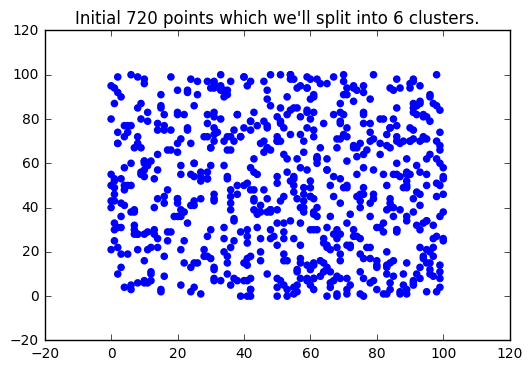

In [1]:
import random
import matplotlib.pyplot as plt

random.seed(120)
xs = []
ys = []

N = 720
K = 6

points = []
for i in range(0, N):
  x = random.randint(0, 100)
  y = random.randint(0, 100)
  points.append((x, y))

xs = [p[0] for p in points]
ys = [p[1] for p in points]

plt.scatter(xs, ys, edgecolors='none', s=30)
plt.title('Initial %d points which we\'ll split into %d clusters.' % (N, K))
plt.show()

Plotting


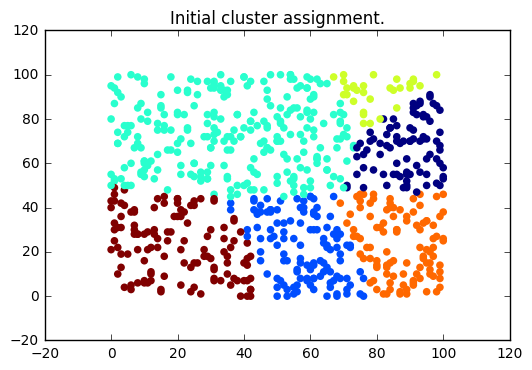

In [2]:
cluster = [-1] * N
import numpy as np

def plot_points(title):
  print 'Plotting'
  xs = [p[0] for p in points]
  ys = [p[1] for p in points]
  colors = [(cc / float(K)) for cc in cluster]
  assert(len(xs) == N)
  plt.scatter(xs, ys, edgecolors='none', s=30, c=colors)
  plt.title(title)
  plt.show()


indices = range(0, N)
random.shuffle(indices)
mean_point_idxs = indices[0: K]

for i in range(0, K):
  cluster[ mean_point_idxs[i] ] = i

for idx in range(0, N):
  if idx not in mean_point_idxs:
    # Find closest.
    ci = -1
    mindistance = 1 << 30
    for i in range(0, K):
      cm = mean_point_idxs[i]
      distance = (points[idx][0] - points[cm][0]) ** 2 + (points[idx][1] - points[cm][1]) ** 2
      if distance < mindistance:
        mindistance = distance
        ci = i

    cluster[idx] = ci

plot_points('Initial cluster assignment.')
  

MOVED = 108
Plotting


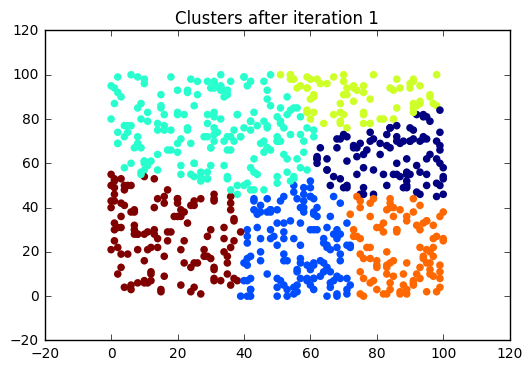

MOVED = 48
Plotting


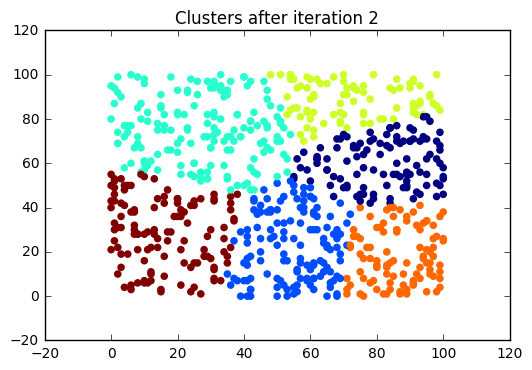

MOVED = 32
Plotting


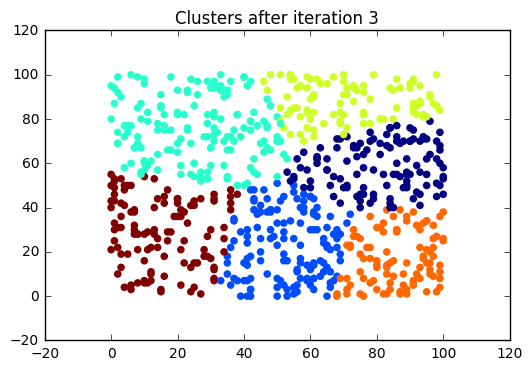

MOVED = 20
Plotting


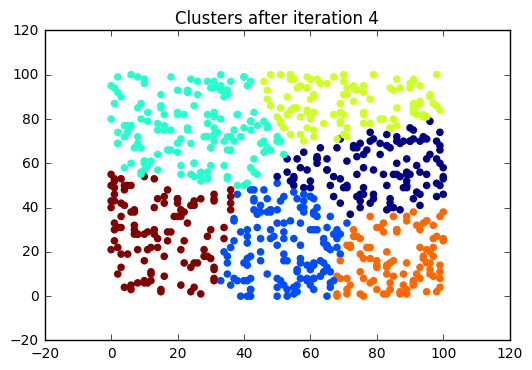

MOVED = 13
Plotting


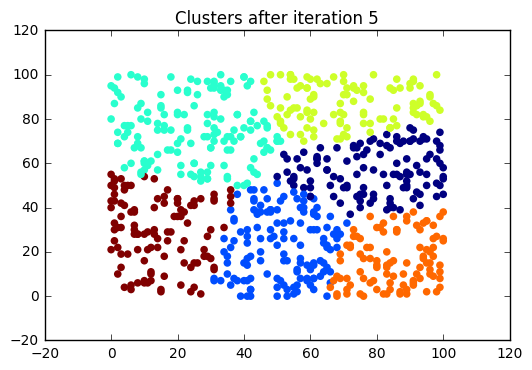

MOVED = 13
Plotting


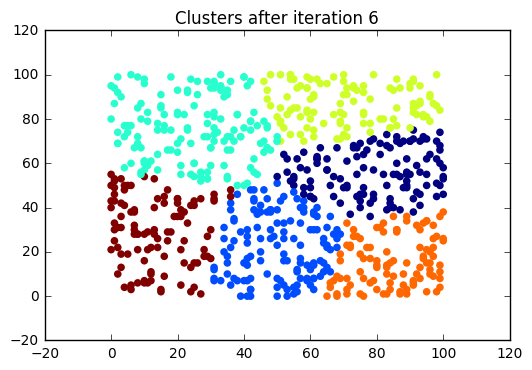

MOVED = 5
Plotting


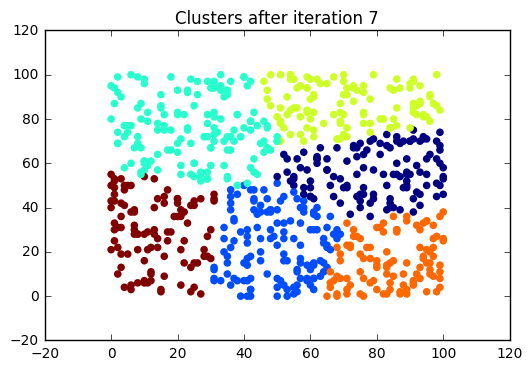

MOVED = 3
Plotting


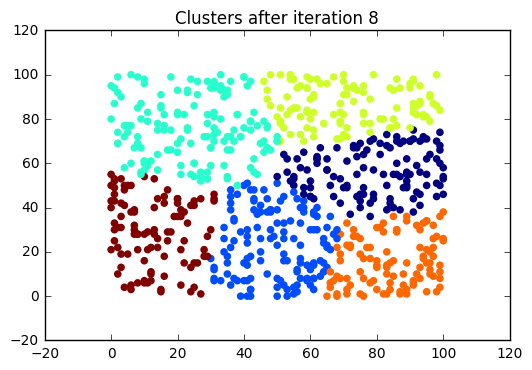

DONE


In [3]:
for iter in range(0, 50):
  # Compute mean for every cluster.
  sumx = [0.0] * K
  sumy = [0.0] * K
  totals = [0] * K
  for i in range(0, N):
    sumx[ cluster[i] ] += points[i][0]
    sumy[ cluster[i] ] += points[i][1]
    totals[ cluster[i] ] += 1

  # Compute new means.
  meanx = [0] * K
  meany = [0] * K
  for i in range(0, K):
    meanx[i] = sumx[i] / totals[i]
    meany[i] = sumy[i] / totals[i]

  # Create new clusters.
  new_cluster = [0] * N
  for i in range(0, N):
    mindist = 1 << 30
    for j in range(0, K):
      dist = (points[i][0] - meanx[j]) ** 2 + (points[i][1] - meany[j]) ** 2
      if dist < mindist:
        mindist = dist
        cluster_idx = j

    new_cluster[i] = cluster_idx

  if cluster == new_cluster:
    print 'DONE'
    break
  else:
    moved = 0
    for i in range(0, N):
      if cluster[i] != new_cluster[i]: moved += 1
    print 'MOVED =', moved

    cluster = new_cluster

  plot_points('Clusters after iteration %d' % (iter+1))      